# Pymaceuticals Inc.
---

### Analysis

- The purpose of this study was to examine and compare the effectivness of Capomulin versus the other medications in the drug regimen for potential treatment of squamous cell carcinoma, a common form of skin cancer. 
- Capomulin and Ramicane were significantly more effective than the other drugs in the study, but Capomulin and Ramicane results were statistically neglible. See Boxplot
- Mouse weight was a factor in the effectiveness of Capomulin. The larger the mouse, the less effective the drug. (0.95) demonstrates a strong correlation of mouse weight vs tumor size. See Linear Regression
 - From my professional opinion , Capomulin is an effective treatment for skin cancer as well as Ramicane. Several studies should be performed during clinical trials to determine the dosage of Capomulin that could be effective regardless of size. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
py_df = pd.merge( mouse_metadata, study_results, how='right', on= 'Mouse ID' )

# Display the data table for preview
py_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_sum = len(py_df['Mouse ID'].unique())
mice_sum

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
py_df_duplicated = py_df[py_df.duplicated(["Mouse ID", "Timepoint"])]
py_df_duplicated['Mouse ID'].unique()



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mouse_data = py_df.loc[py_df["Mouse ID"] == "g989"]
all_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_frame = py_df.loc[(py_df["Mouse ID"] != 'g989')]
clean_data_frame.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_ = len(clean_data_frame['Mouse ID'].unique())
number_of_mice_

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_summary = clean_data_frame.groupby(["Drug Regimen"])
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Get average/mean of tumor volume
Average_tv = drug_summary["Tumor Volume (mm3)"].mean()

# Get the median of tumor volume
Median_tv = drug_summary["Tumor Volume (mm3)"].median()

# Get the variance of tumor volume
Var_tv = drug_summary["Tumor Volume (mm3)"].var()

#Get the standard deviation of tumor volume
Sd_tv = drug_summary["Tumor Volume (mm3)"].std()

#Get the SEM of tumor volume
Sem_tv = drug_summary["Tumor Volume (mm3)"].sem()

#Create a new dataframe with new information

Drug_summary_table = pd.DataFrame({ "Mean Tumor Volume":Average_tv, 
                                    "Median Tumor Volume": Median_tv, 
                                    "Variance Tumor Volume": Var_tv, 
                                    "Standard Deviation Tumor Volume": Sd_tv,
                                     "SEM Tumor Volume":Sem_tv
    
    
})

Drug_summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_table = clean_data_frame.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

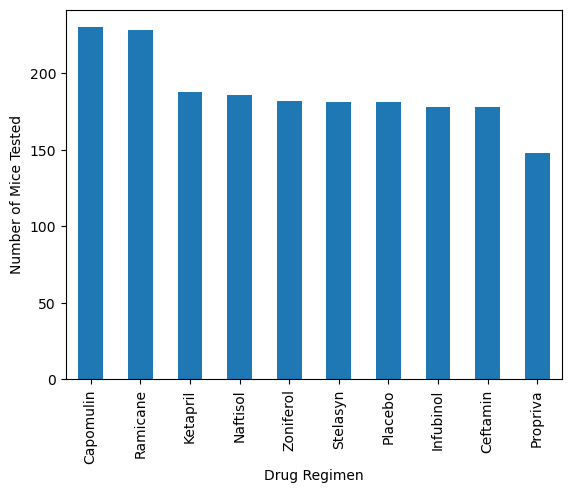

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice = clean_data_frame["Drug Regimen"].value_counts()
total_mice.plot(kind="bar", xlabel='Drug Regimen', ylabel='Number of Mice Tested')


Text(0, 0.5, 'Number of Mice Tested')

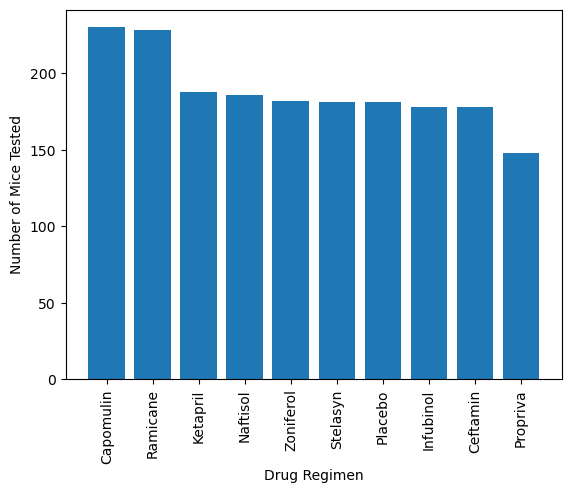

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(total_mice.index.values,total_mice.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

<AxesSubplot:ylabel='Sex'>

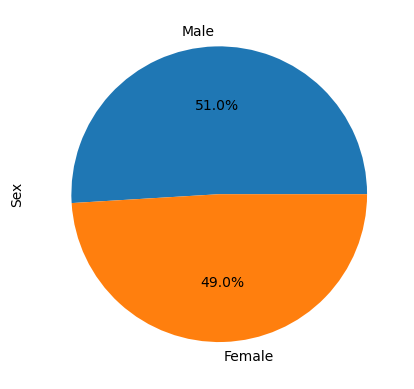

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_data_frame.Sex.value_counts()
mice_gender.plot.pie(autopct = "%1.1f%%")

([<matplotlib.patches.Wedge at 0x7fb924587fd0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

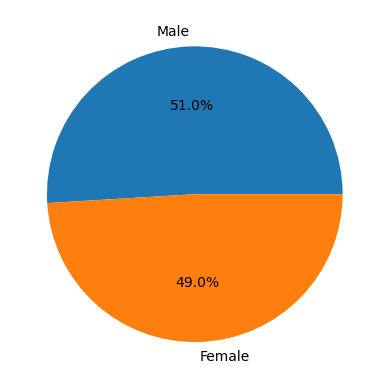

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender.values,labels=mice_gender.index.values,autopct = "%1.1f%%")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_max = clean_data_frame.groupby("Mouse ID")["Timepoint"].max()
tumor_max = tumor_max.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merge = tumor_max.merge(clean_data_frame,on=["Mouse ID","Timepoint"],how="left")
tumor_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_treatments:
    volume = tumor_merge.loc[tumor_merge["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_vol.append(volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lowerq = volume.quantile(.25)
    upperq = volume.quantile(.75)
    IQR = upperq - lowerq
    upperbound = upperq + (IQR * 1.5)
    lowerbound = lowerq - (IQR * 1.5)
    outliers = volume.loc[(volume<lowerbound)|(volume>upperbound)]
    print(f"{drug}{outliers}")

CapomulinSeries([], Name: Tumor Volume (mm3), dtype: float64)
RamicaneSeries([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol31    36.321346
Name: Tumor Volume (mm3), dtype: float64
CeftaminSeries([], Name: Tumor Volume (mm3), dtype: float64)


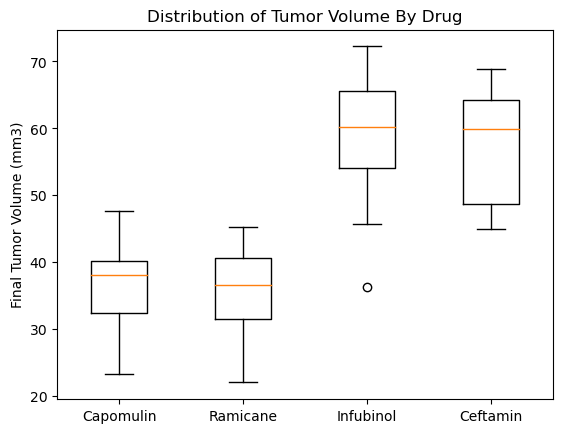

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol)
plt.title('Distribution of Tumor Volume By Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

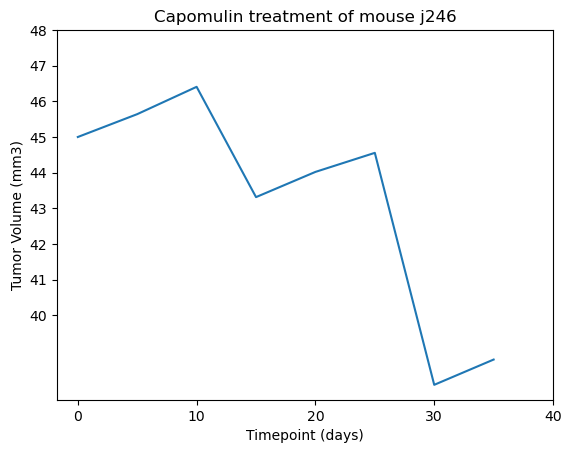

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mousedata = clean_data_frame.loc[clean_data_frame['Mouse ID']== 'j246']


plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse j246')
plt.xticks([0, 10, 20, 30, 40])
plt.yticks([40, 41, 42, 43, 44, 45, 46, 47, 48])
plt.show()

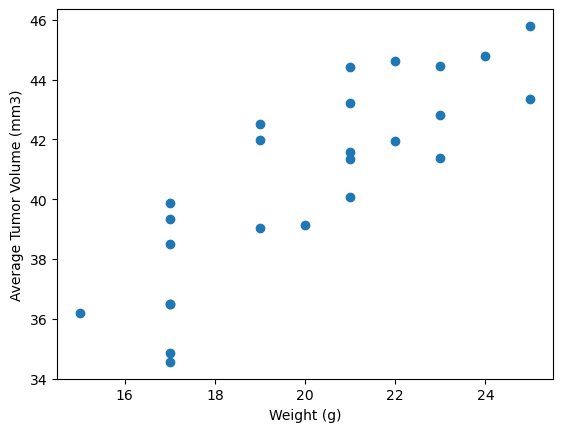

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = clean_data_frame.loc[clean_data_frame['Drug Regimen'] == 'Capomulin']
avg_tum_vol = capomulin_regimen.groupby('Mouse ID').mean()
new_df = capomulin_regimen.merge(avg_tum_vol, on='Mouse ID')
avg_vol_df = avg_tum_vol[['Weight (g)', 'Tumor Volume (mm3)']].drop_duplicates()


plt.scatter(avg_tum_vol['Weight (g)'],avg_tum_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()   

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


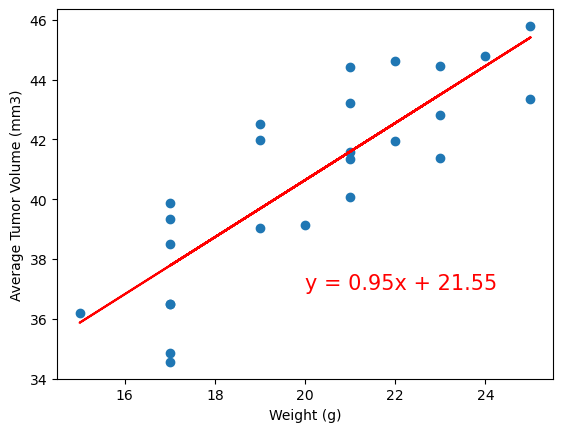

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_regimen = clean_data_frame.loc[clean_data_frame['Drug Regimen'] == 'Capomulin']
avg_tum_vol = capomulin_regimen.groupby('Mouse ID').mean()
new_df = capomulin_regimen.merge(avg_tum_vol, on='Mouse ID')
avg_vol_df = avg_tum_vol[['Weight (g)', 'Tumor Volume (mm3)']].drop_duplicates()
x = avg_vol_df['Weight (g)']
y = avg_vol_df['Tumor Volume (mm3)']

correlation = st.pearsonr(x,y)

print (f"""The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.""" )

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regression,"r-")

plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show() 